# IMPORTING THE LIBRARIES

In [36]:
import numpy as np # linear algebra
import pandas as pd # data analysis and manupulation tools
import matplotlib.pyplot as plt #visualization of datasets
import seaborn as sns# plotting the histogram ,graphs etc
import datetime
import calendar
%matplotlib inline

### reading the csv datasets

In [3]:
uber_xp=pd.read_csv('datasets_1026_1855_My Uber Drives - 2016 (1).csv')

# EXPLORATORY DATA ANALYSIS

In [4]:
uber_xp.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
uber_xp.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [6]:
uber_xp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [7]:
uber_xp.isnull().sum# empty values present


<bound method DataFrame.sum of       START_DATE*  END_DATE*  CATEGORY*  START*  STOP*  MILES*  PURPOSE*
0           False      False      False   False  False   False     False
1           False      False      False   False  False   False      True
2           False      False      False   False  False   False     False
3           False      False      False   False  False   False     False
4           False      False      False   False  False   False     False
...           ...        ...        ...     ...    ...     ...       ...
1151        False      False      False   False  False   False     False
1152        False      False      False   False  False   False     False
1153        False      False      False   False  False   False     False
1154        False      False      False   False  False   False     False
1155        False       True       True    True   True   False      True

[1156 rows x 7 columns]>

In [11]:
#printing all the columns having numerical values

num_col = uber_xp.select_dtypes(include= np.number).columns
print( "numerical columns are:",num_col)

numerical columns are: Index(['MILES*'], dtype='object')


In [14]:
#printing the column with categorical values
char_col = uber_xp.select_dtypes(exclude= np.number).columns
print("categorical column:",char_col)

categorical column: Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'PURPOSE*'], dtype='object')


# cleaning the datasets

In [15]:
 uber_xp = uber_xp[:-1]# removing the last row as its contain null values

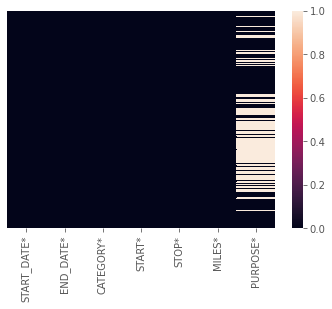

In [18]:
sns.heatmap(uber_xp.isnull(),yticklabels=False) 

In [19]:
uber_xp['START_DATE*']=uber_xp['START_DATE*'].astype('datetime64[ns]')# intialising the start date and end date
uber_xp['END_DATE*']=uber_xp['END_DATE*'].astype('datetime64[ns]')


## Time required for the trips

In [26]:
# time required for the trips by subtracting the end date from start date
uber_xp['time']=uber_xp['END_DATE*']-uber_xp['START_DATE*']


In [27]:
#printing the first 5rows of the  new datasets
uber_xp.head(5)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,01:07:00


In [28]:
#converting into minutes
uber_xp['time'] = uber_xp['time'].dt.total_seconds()/60.0
uber_xp.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


In [31]:
#calculating the speed as we got the time and the miles
uber_xp['speed']=(uber_xp['MILES*']/uber_xp['time'])*60
uber_xp.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,time,speed
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,51.000000
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0,25.000000
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,22.153846
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,20.142857
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,57.044776


In [32]:
uber_xp.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,time,speed
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,6.000000
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,13.000000
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,27.771429
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,21.333333
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site,103.0,28.077670


### average speed of the trips

In [42]:
avg_trp = uber_xp.groupby('speed').mean()

In [43]:
print(avg_trp)

            MILES*   time  HOUR    DAY  DAY_OF_WEEK  MONTH
speed                                                     
3.917355      7.90  121.0  15.0  23.00         1.00    8.0
4.800000      9.60  120.0  20.0  20.00         1.00    9.0
4.909091     12.60  154.0  16.0  29.00         3.00    9.0
5.475000      7.30   80.0  19.0  27.00         1.00    9.0
6.000000      2.30   23.0   9.5  22.00         2.50    9.0
...            ...    ...   ...    ...          ...    ...
397.411765  112.60   17.0  17.0   6.00         3.00   10.0
552.000000   18.40    2.0  18.0   6.00         3.00   10.0
664.000000   33.20    3.0  10.0   7.00         4.00   10.0
906.000000   15.10    1.0  12.0   4.00         1.00   10.0
inf          18.75    0.0  13.0  10.75         3.25    9.5

[726 rows x 6 columns]


In [33]:
# transformation to hours and day

In [34]:
uber_xp['START_DATE*'] = pd.to_datetime(uber_xp['START_DATE*'], format="%m/%d/%Y %H:%M") 


In [39]:
dpp['END_DATE*'] = pd.to_datetime(dpp['END_DATE*'], format="%m/%d/%Y %H:%M")

In [38]:
#empty sets
hour=[]  
day=[]
dayofweek=[]
month=[]
weekday=[]
#appending the values
for x in uber_xp['START_DATE*']:
    hour.append(x.hour) 
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
    #creating columns
uber_xp['HOUR']=hour 
uber_xp['DAY']=day
uber_xp['DAY_OF_WEEK']=dayofweek
uber_xp['MONTH']=month
uber_xp['WEEKDAY']=weekday


In [40]:
#printing the first few column of the new datasets
uber_xp.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,time,speed,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,51.000000,21,1,4,1,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0,25.000000,1,2,5,1,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,22.153846,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,20.142857,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,57.044776,14,6,2,1,Wednesday


## Trips per hour a day

Text(0.5, 1.0, 'trips per hour a day')

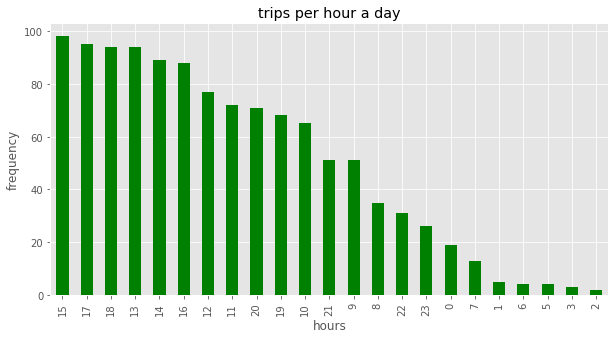

In [47]:
uber_xp['HOUR'].value_counts().plot(kind='bar',figsize=(10,5),color='green')
plt.xlabel("hours")
plt.ylabel("frequency")
plt.title("trips per hour a day")

### Trips per day of a week

Text(0.5, 1.0, 'no.of trips per day of the week')

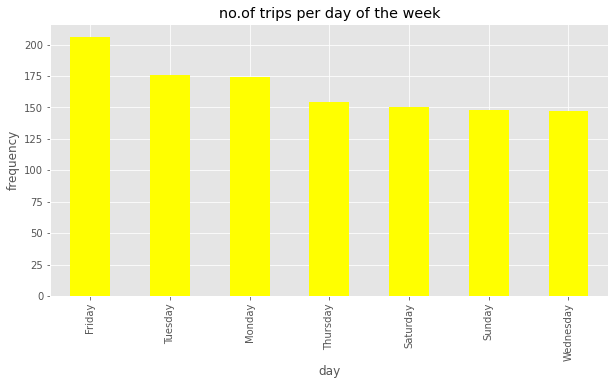

In [52]:
uber_xp['WEEKDAY'].value_counts().plot(kind='bar',figsize=(10,5),color='yellow') 
plt.xlabel('day')
plt.ylabel('frequency')
plt.title('no.of trips per day of the week')

## no of trips per month of a year

Text(0.5, 1.0, 'no. of trips per month of the year')

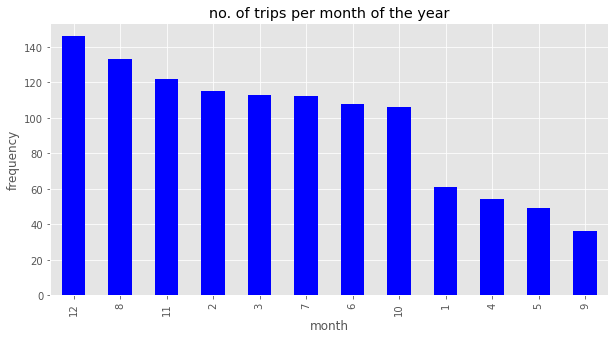

In [51]:

uber_xp['MONTH'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')
plt.xlabel('month')
plt.ylabel('frequency')
plt.title('no. of trips per month of the year')

### from the above graph we can say that the month 12 has the highest number of trips